In [2]:
function A(U,i,V,h,dx)
    return -1.0*d(V,U,i,dx)-1.0*d(h,U,i,dx)
end

A (generic function with 1 method)

In [3]:
function h(s)
    n=2.0
    return (n*(s^(n-1)-1))/(n-1)
    end

h (generic function with 1 method)

In [4]:
function d(f,U,i,dx) # dérivée
    #println((f(U[i+1])-1.0*f(U[i])))
    return (f(U[i+1])-1.0*f(U[i]))/dx
end

d (generic function with 1 method)

In [5]:
function schema(a,b,nx,T,nt,U0,V) 
    deltaT = T/nt
    deltaX=(b-a)/nx
    U0=u0.(linspace(a,b,nx));# element par element
    S=ones(nt,nx)
    S[1,:]=U0;
    U=zeros(1,nx);
    for n=2:nt
        for i=2:nx-1
            x1 = (1.0-(deltaT/deltaX)*(max(0.0,A(U,i,V,h,deltaX))+max(0.0,-1.0*A(U,i,V,h,deltaX))))*S[n-1,i];
            x2 = (deltaT/deltaX)*max(0.0,-1.0*A(U,i,V,h,deltaX))*S[n-1,i+1];
            x3 = (deltaT/deltaX)*max(0.0,A(U,i,V,h,deltaX))*S[n-1,i-1];
            U[i] = x1+x2+x3;
        end         
        S[n,:]=U;
    end
    return S
end

schema (generic function with 1 method)

In [6]:
function schemacomplet(a,b,nx,T,nt,U0,V) 
    deltaT = T/nt
    deltaX=(b-a)/nx
    U0=u0.(linspace(a,b,nx));# element par element
    S=ones(nt,nx)
    S[1,:]=U0;
    U=zeros(1,nx);
    for n=2:nt
        x1 = (1.0-(deltaT/deltaX)*(max(0.0,A(U,1,V,h,deltaX))+max(0.0,-1.0*A(U,1,V,h,deltaX))))*S[n-1,1];
        x2 = (deltaT/deltaX)*max(0.0,-1.0*A(U,1,V,h,deltaX))*S[n-1,2];
        U[1] = x1+x2;
        for i=2:nx-1
            x1 = (1.0-(deltaT/deltaX)*(max(0.0,A(U,i,V,h,deltaX))+max(0.0,-1.0*A(U,i,V,h,deltaX))))*S[n-1,i];
            x2 = (deltaT/deltaX)*max(0.0,-1.0*A(U,i,V,h,deltaX))*S[n-1,i+1];
            x3 = (deltaT/deltaX)*max(0.0,A(U,i,V,h,deltaX))*S[n-1,i-1];
            U[i] = x1+x2+x3;
        end
        x1 = (1.0-(deltaT/deltaX)*(max(0.0,A(U,nx,V,h,deltaX))+max(0.0,-1.0*A(U,nx,V,h,deltaX))))*S[n-1,nx];
        x3 = (deltaT/deltaX)*max(0.0,A(U,nx,V,h,deltaX))*S[n-1,nx-1];
        U[nx] = x1+x3;
        S[n,:]=U;
    end
    return S
end

schemacomplet (generic function with 1 method)

In [7]:
function V(x)
   return 0.5*abs(x)^2
end

V (generic function with 1 method)

In [8]:
function u0(x)
   return 0.5*sin.(x)+0.5
end

u0 (generic function with 1 method)

In [9]:
U=schema(-1,1,10,10,20000,u0,V)

20000×10 Array{Float64,2}:
 0.0792645  0.149151  0.236292  0.336403  …  0.763708  0.850849  0.920735
 0.0        0.149151  0.236292  0.336403     0.763708  0.850849  0.0     
 0.0        0.149359  0.236579  0.336752     0.763974  0.848601  0.0     
 0.0        0.149568  0.236866  0.337102     0.764225  0.846425  0.0     
 0.0        0.149777  0.237153  0.337452     0.764462  0.844317  0.0     
 0.0        0.149986  0.23744   0.337802  …  0.764686  0.842276  0.0     
 0.0        0.150196  0.237728  0.338153     0.764897  0.840298  0.0     
 0.0        0.150406  0.238017  0.338504     0.765096  0.838381  0.0     
 0.0        0.150616  0.238306  0.338855     0.765284  0.836523  0.0     
 0.0        0.150827  0.238595  0.339207     0.765462  0.834722  0.0     
 0.0        0.151039  0.238885  0.339558  …  0.76563   0.832975  0.0     
 0.0        0.15125   0.239175  0.33991      0.765788  0.831281  0.0     
 0.0        0.151462  0.239465  0.340263     0.765938  0.829637  0.0     
 ⋮         

In [10]:
x = u0.(linspace(-1,1,10))

10-element Array{Float64,1}:
 0.0792645
 0.149151 
 0.236292 
 0.336403 
 0.444559 
 0.555441 
 0.663597 
 0.763708 
 0.850849 
 0.920735 

In [11]:
Pkg.add("PyPlot")
using PyPlot

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


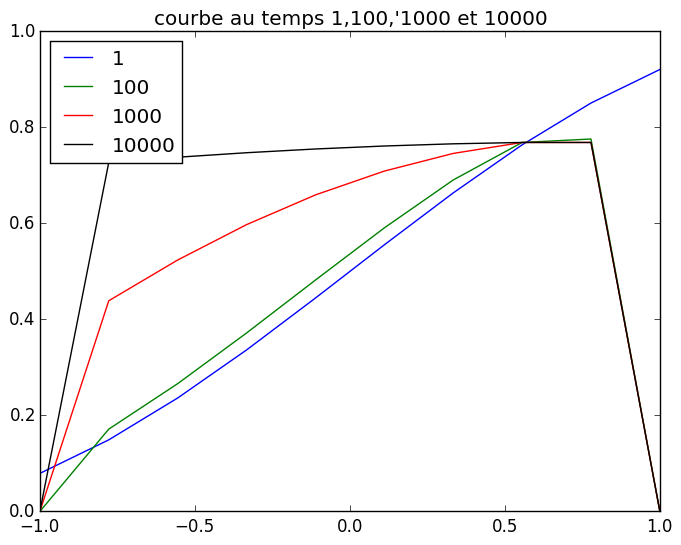

In [12]:


plot(linspace(-1,1,10),U[1,:],color="blue");
plot(linspace(-1,1,10),U[100,:],color="green");
plot(linspace(-1,1,10),U[1000,:],color="red");
plot(linspace(-1,1,10),U[10000,:],color="black");
title("courbe au temps 1,100,'1000 et 10000")
legend(["1";"100";"1000";"10000"],loc=2)

grid()=on;


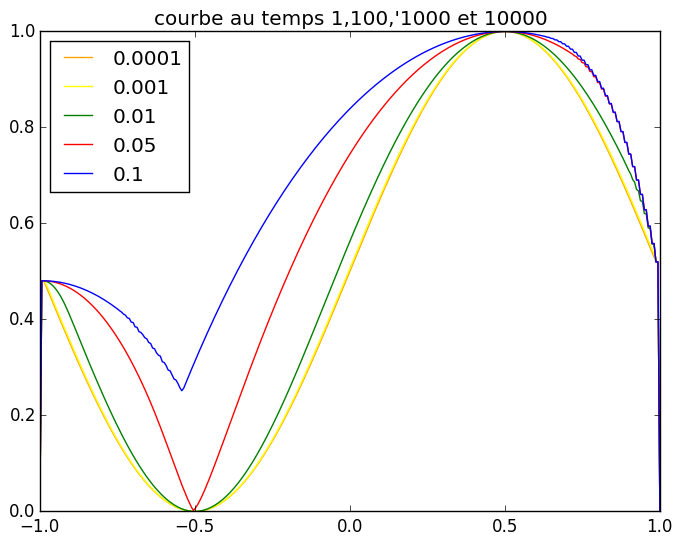

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [14]:
function h(s)
    n=2.0
    return (n*(s^(n-1)-1))/(n-1)
end

function V(x)
   return 0.5*abs(x)^2
end

function u0(x)
   return 0.5*sin(pi*x)+0.5;
end



U=schema(-1,1,320,0.1,100000,u0,V)
X=linspace(-1,1,320)
Pkg.add("PyPlot")
using PyPlot

plot(X,U[100,:],color="orange");
plot(X,U[1000,:],color="yellow");
plot(X,U[10000,:],color="green");
plot(X,U[50000,:],color="red");
plot(X,U[100000,:],color="blue");
title("courbe au temps 1,100,'1000 et 10000")
legend(["0.0001";"0.001";"0.01";"0.05";"0.1"],loc=2)

grid()=on;

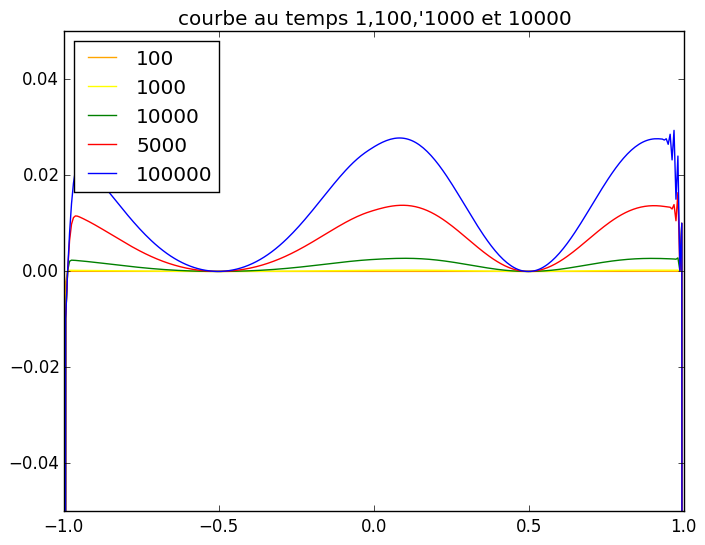

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [12]:

function h(s)
    if (s>=1)
        return (3.0*(s^2)/2.0 -6.0*s + 3.0*log(s)+9.0/2.0)
    else
        return 0.0;
    end
end

function V(x)
   return 0.5*abs(x)^2
end

function u0(x)
   return 0.5*sin(pi*x)+1.0;
end



U=schema(-1,1,320,0.01,100000,u0,V)
X=linspace(-1,1,320)
Pkg.add("PyPlot")
using PyPlot

plot(X,U[100,:]-U[1,:],color="orange");
plot(X,U[1000,:]-U[1,:],color="yellow");
plot(X,U[10000,:]-U[1,:],color="green");
plot(X,U[50000,:]-U[1,:],color="red");
plot(X,U[100000,:]-U[1,:],color="blue");
title("courbe au temps 1,100,'1000 et 10000")
legend(["100";"1000";"10000";"5000";"100000"],loc=2)
ylim(-0.05,0.05)

grid()=on;